**Lab-05: K-mean Clustering**

1. Randomly assign a number, from 1 to K, to each observations. There serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignments stop changing:
    
    2.1 For each of the K clusters, compute the cluster centroid. the $k_th$ cluster centroid is the vector of the "p" feature means for the observations in the "kth" cluster.
    
    2.2 Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).



In [1]:
#Tải data từ github
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data_1.csv

--2021-05-15 22:01:56--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57341 (56K) [text/plain]
Saving to: ‘data_1.csv.25’

data_1.csv.25       100%[===================>]  56,00K  --.-KB/s    in 0,03s   

2021-05-15 22:01:57 (1,68 MB/s) - ‘data_1.csv.25’ saved [57341/57341]



In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
data=pd.read_csv("data_1.csv")


In [3]:
data.head()

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780


data này chỉ gồm có 2 giá trị là x1 và x2, nhiệm vụ chúng ta là phân cụm cho data này theo $M$ nhóm, ở đây ta chọn $M=3$ 

In [4]:
X=data.values
np.random.seed(32)
#Khởi tạo các centroids
init_centroids=X[np.random.choice(X.shape[0],3,replace=False)]
init_centroids

array([[-9.3555055 , -5.62613759],
       [-5.94607231, -2.16216584],
       [ 1.88144537,  0.95555062]])

In [5]:
#gán label sau mỗi vòng lặp
def assign_label(X,centers):
    D=cdist(X,centers,'euclidean') #thư viện để tính khoảng cách euclidean
    return np.argmin(D,axis=1)
#gán các centroids sau mỗi vòng lặp
def update_centroids(X,label,K):
    center=np.zeros([K,X.shape[1]])
    for i in range(K):
        X_=X[label==i, :]
        center[i,:]=np.mean(X_,axis=0)
    return center
#Check xem đã hội tụ chưa
def has_converged(new_label,old_label):
    return (new_label==old_label).all()

centroids=init_centroids
it=0
while True:
    it+=1
    #đánh label
    labels=assign_label(X,centroids)
    #lưu các centroids cũ
    old_centers=centroids.copy()
    centroids=update_centroids(X,labels,3)
    print(it)
    if has_converged(centroids,old_centers):
        break


1
2
3
4
5


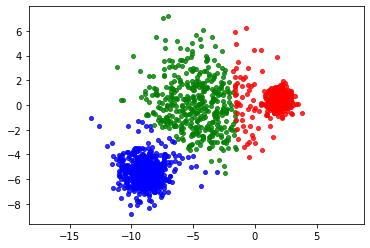

In [6]:
#Vẽ hình thử
import matplotlib.pyplot as plt
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 4, alpha = .8)
    plt.plot(X1[:,0], X1[:,1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:,0], X2[:,1], 'ro', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X,labels)


#Bài tập

1. Hãy dùng thuật toán K-mean để chọn ra số cụm thích hợp (như trong slide bài giảng) dựa trên tập training, và dự đoán label của các quan sát trên tập testing của bộ dữ liệu bên dưới.
2. Vẽ hình các cụm trên tập testing

Đường cong WCV nên như sau:

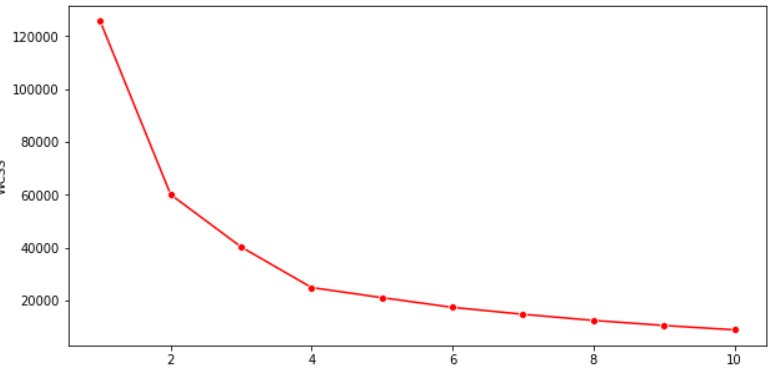

In [7]:
!wget "https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv"

--2021-05-15 22:01:58--  https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-05/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4,2K) [text/plain]
Saving to: ‘data.csv.25’

data.csv.25         100%[===================>]   4,19K  --.-KB/s    in 0s      

2021-05-15 22:01:58 (22,1 MB/s) - ‘data.csv.25’ saved [4286/4286]



In [8]:
data=pd.read_csv("data.csv")
data.head()




,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Đây là data thông tin về khách hàng. Từ đây, ta sẽ tiến hành phân cụm các khách hàng này.
data này gồm:
* CustomerID: Số thứ tự khách hàng
* Genre: Giới tính
* Age: Tuổi
* Annual Income: Mức thu nhập hằng năm
* Spending Score: Chỉ số tiêu dùng 

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
#Check data có NULL hay không
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#Drop duplicates 
data.drop_duplicates(inplace=True)

# Cau 1

In [12]:
X = data.iloc[:, [2, 3]].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
np.random.seed(42)

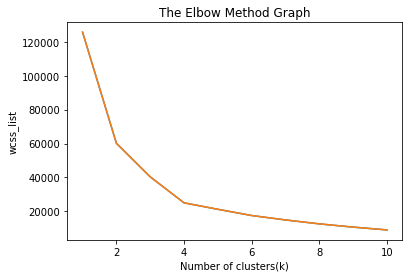

In [13]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  

plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

Chọn k = 4

In [14]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42).fit(X_train)

In [15]:
#Khởi tạo các centroids
init_centroids=X_train[np.random.choice(X_train.shape[0],k,replace=False)]
init_centroids

cdist(X_train,init_centroids,'euclidean')

np.argmin(cdist(X_train,init_centroids,'euclidean'),axis=1)

#gán label sau mỗi vòng lặp
def assign_label(X,centers):
    D=cdist(X,centers,'euclidean') #thư viện để tính khoảng cách euclidean
    return np.argmin(D,axis=1)
#gán các centroids sau mỗi vòng lặp
def update_centroids(X,label,K):
    center=np.zeros([K,X.shape[1]])
    for i in range(K):
        X_=X[label==i, :]
        center[i,:]=np.mean(X_,axis=0)
    return center
#Check xem đã hội tụ chưa
def has_converged(new_label,old_label):
    return (new_label==old_label).all()

centroids=init_centroids
it=0
while True:
    it+=1
    #đánh label
    labels=assign_label(X_train,centroids)
    #lưu các centroids cũ
    old_centers=centroids.copy()
    centers=update_centroids(X_train,labels,k)
    print(it)
    if has_converged(centroids,old_centers):
        break

1


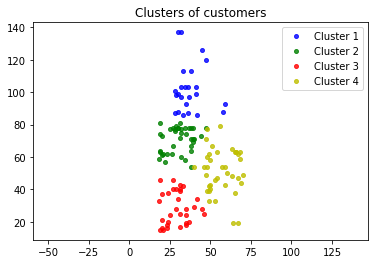

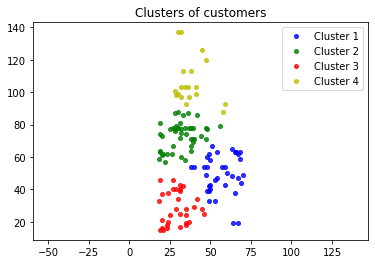

In [16]:
#Vẽ hình thử
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    
    plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 4, alpha = .8, label = 'Cluster 1')
    plt.plot(X1[:,0], X1[:,1], 'go', markersize = 4, alpha = .8, label = 'Cluster 2')
    plt.plot(X2[:,0], X2[:,1], 'ro', markersize = 4, alpha = .8, label = 'Cluster 3')
    plt.plot(X3[:,0], X3[:,1], 'yo', markersize = 4, alpha = .8, label = 'Cluster 4')
    #plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label = 'Centroid')
    plt.axis('equal')
    plt.title('Clusters of customers')
    plt.legend()
    plt.plot()
    plt.show()
    
kmeans_display(X_train,labels)
kmeans_display(X_train,kmeans.labels_)

In [17]:
# Dự đoán labels tập test
it=0
while True:
    it+=1
    #đánh label
    labels=assign_label(X_test,centroids)
    #lưu các centroids cũ
    old_centers=centroids.copy()
    centers=update_centroids(X_test,labels,k)
    print(it)
    if has_converged(centroids,old_centers):
        break

1


# Cau2

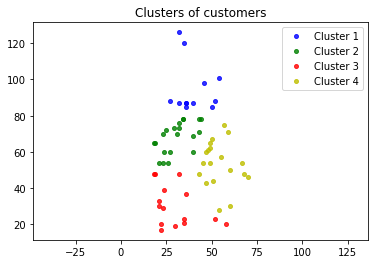

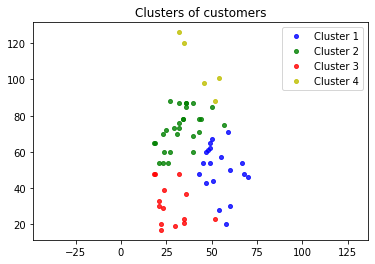

In [19]:
#Vẽ hình thử
kmeans_display(X_test,labels)
kmeans_display(X_test,kmeans.predict(X_test))